In [1]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
import pandas as pd
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot


In [4]:
# 1. Loading Data
iris = datasets.load_iris()
# Predictors Two columns : Sepal Length and Sepal Width
predictors_vals = np.array([predictor[0:2] for predictor in iris.data])
# For setosa Species, target is 0. 
target_vals = np.array([1. if predictor==0 else 0. for predictor in iris.target])


# 2. Split data into train/test = 75%/25%
predictors_vals_train, predictors_vals_test, target_vals_train, target_vals_test = train_test_split(predictors_vals, target_vals, 
                                                    train_size=0.75,
                                                    random_state=0)


In [5]:
# 3. Normalize if needed


#4.Initialize placeholders that will contain predictors and target
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#5. Create variables (Weight and Bias) that will be tuned up
W = tf.Variable(tf.ones(shape=[2,1]))
b = tf.Variable(tf.ones(shape=[1,1]))



In [6]:
# 6. Declare model operations : y = xW +b 
model = tf.add(tf.matmul(x_data, W), b)

#7. Declare loss function and Optimizer
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=y_target))
my_opt = tf.train.AdamOptimizer(0.02) #learning rate =0.02
train_step = my_opt.minimize(loss)

#8. Initialize variables and session
init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

#9. Actual Prediction: 
prediction = tf.round(tf.sigmoid(model))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)




In [7]:
#10. Training loop
lossArray = []
trainAccuracy = []
testAccuracy = []
for i in range(1000):
    #Random instances for Batch size 
    batch_size = 4 #Declare batch size
    batchIndex = np.random.choice(len(predictors_vals_train), size=batch_size)
    batchX = predictors_vals_train[batchIndex]
    batchY = np.transpose([target_vals_train[batchIndex]])
    # Tuning weight and bias while minimizing loss function through optimizer
    sess.run(train_step, feed_dict={x_data: batchX, y_target: batchY})
    #loss function per epoch/generation
    batchLoss = sess.run(loss, feed_dict={x_data: batchX, y_target: batchY})
    lossArray.append(batchLoss) # adding it to loss_vec
    # accuracy for each epoch for train
    batchAccuracyTrain = sess.run(accuracy, feed_dict={x_data: predictors_vals_train, y_target: np.transpose([target_vals_train])})
    trainAccuracy.append(batchAccuracyTrain) # adding it to train_acc 
    # accuracy for each epoch for test
    batchAccuracyTest = sess.run(accuracy, feed_dict={x_data: predictors_vals_test, y_target: np.transpose([target_vals_test])})
    testAccuracy.append(batchAccuracyTest)
    # printing loss after 10 epochs/generations to avoid verbosity
    if (i+1)%50==0:
        print('Loss = ' + str(batchLoss)+ ' and Accuracy = '   + str(batchAccuracyTrain))
        



Loss = 0.783705 and Accuracy = 0.330357
Loss = 0.356201 and Accuracy = 0.669643
Loss = 0.824993 and Accuracy = 0.669643
Loss = 1.10484 and Accuracy = 0.669643
Loss = 0.450501 and Accuracy = 0.669643
Loss = 0.414195 and Accuracy = 0.669643
Loss = 0.4335 and Accuracy = 0.6875
Loss = 0.468891 and Accuracy = 0.794643
Loss = 0.479287 and Accuracy = 0.982143
Loss = 0.176276 and Accuracy = 0.883929
Loss = 0.486633 and Accuracy = 0.946429
Loss = 0.189483 and Accuracy = 0.866071
Loss = 0.429071 and Accuracy = 0.910714
Loss = 0.351552 and Accuracy = 0.901786
Loss = 0.249853 and Accuracy = 0.973214
Loss = 0.414324 and Accuracy = 0.982143
Loss = 0.308642 and Accuracy = 0.991071
Loss = 0.144662 and Accuracy = 0.991071
Loss = 0.206221 and Accuracy = 0.982143
Loss = 0.198529 and Accuracy = 0.982143


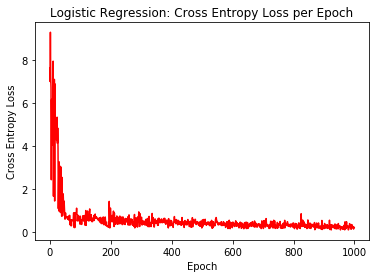

In [8]:
# 11. Check model performance
pyplot.plot(lossArray, 'r-' )
pyplot.title('Logistic Regression: Cross Entropy Loss per Epoch')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy Loss')
pyplot.show()
